In [28]:
#P3pcaExampleF21
#PCA example
import numpy as np
from numpy import linalg as LA
import tensorflow as tf


In [29]:
## This section is added by frederik
#Import x-data
import math
import numpy as np

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training set and a randomly slected small validation set
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]] 


#Part 1 output data: VL (V) and Power out (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]] 


xarray= np.array(xdata)
yarray= np.array(ydata)
#print (xdata)
#print (xarray)
#print (ydata)
#print (yarray)

# define meadian values of input variables - add your values here
Tamean = np.mean(xarray[:,0])  #make sure Tamed does not = 0
IDmean = np.mean(xarray[:,1])
RLmean = np.mean(xarray[:,2])
print(Tamean)
print(IDmean)
print(RLmean)
Tastd = np.std(xarray[:,0])
IDstd = np.std(xarray[:,1])
RLstd = np.std(xarray[:,2])
print(Tastd)
print(IDstd)
print(RLstd)
for i in range(xarray.shape[0]):
    xarray[i,0] = (xarray[i,0]-Tamean)/Tastd
    xarray[i,1] = (xarray[i,1]-IDmean)/IDstd
    xarray[i,2] = (xarray[i,2]-RLmean)/RLstd
    

10.0
800.0
6.696
16.32993161855452
335.4101966249685
1.8224203686306846


In [30]:
#X = np.array([[7,4,3],[4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])#define array
X = xarray
print (X)
print (X.T)  #print the transpose
Xmean = np.mean(X,0)  # compute mean vector
print (Xmean)

[[-1.22474487 -1.34164079 -1.22474487]
 [-1.22474487 -0.4472136  -1.22474487]
 [-1.22474487  0.4472136  -1.22474487]
 [-1.22474487  1.34164079 -1.22474487]
 [ 0.         -1.34164079 -1.22474487]
 [ 0.         -0.4472136  -1.22474487]
 [ 0.          0.4472136  -1.22474487]
 [ 0.          1.34164079 -1.22474487]
 [ 1.22474487 -1.34164079 -1.22474487]
 [ 1.22474487 -0.4472136  -1.22474487]
 [ 1.22474487  0.4472136  -1.22474487]
 [ 1.22474487  1.34164079 -1.22474487]
 [-1.22474487 -1.34164079  0.        ]
 [-1.22474487 -0.4472136   0.        ]
 [-1.22474487  0.4472136   0.        ]
 [-1.22474487  1.34164079  0.        ]
 [ 0.         -1.34164079  0.        ]
 [ 0.         -0.4472136   0.        ]
 [ 0.          0.4472136   0.        ]
 [ 0.          1.34164079  0.        ]
 [ 1.22474487 -1.34164079  0.        ]
 [ 1.22474487 -0.4472136   0.        ]
 [ 1.22474487  0.4472136   0.        ]
 [ 1.22474487  1.34164079  0.        ]
 [-1.22474487 -1.34164079  1.22474487]
 [-1.22474487 -0.4472136 

In [31]:
C = np.cov(X.T)  #transpose is matrix we want to work with - compute covariance matrix
print (C)

[[ 1.02857143e+00 -7.85339525e-18  3.21435322e-18]
 [-7.85339525e-18  1.02857143e+00  4.65254975e-18]
 [ 3.21435322e-18  4.65254975e-18  1.02857143e+00]]


In [32]:
w, v = LA.eig(C)  # get the eigenvalues w and the eigenvectors 
print (w)
print (v)

[1.02857143 1.02857143 1.02857143]
[[ 7.07106781e-01 -7.07106781e-01 -4.07653653e-18]
 [-6.54413778e-01 -6.54413778e-01  5.86657625e-01]
 [ 2.67848105e-01  2.67848105e-01  8.09835064e-01]]


In [33]:
#A  = np.array([v[:,2],v[:,1]])  # form the transformation matrix using eigenvectors
# for the top two eigenvalues
#print(A)

In [34]:
# Task 1.1b says remove sections with X-X_mean
#Y = np.matmul(A,(X-Xmean).T) # Apply transformation to obtain new   
                             # data representation in 2-D
#print(Y)

In [35]:
#xhat = np.matmul(A.T,Y).T + Xmean  #recover the original data using the inverse transform
#print(xhat)

In [36]:
#mse = np.sum((X - xhat)**2)/10  #mean squared error
#print(mse)

<IPython.core.display.Javascript object>


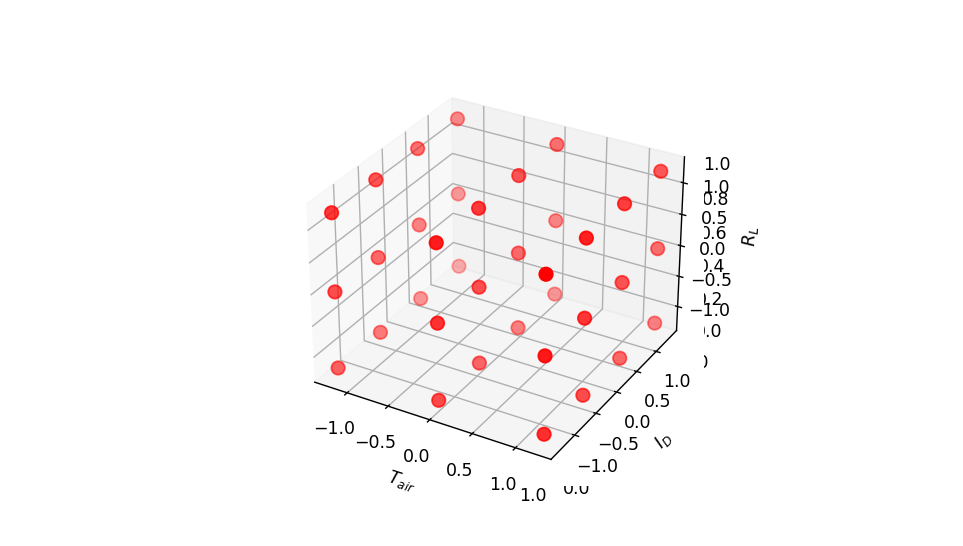

C:\Users\Frederik\Anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if sys.path[0] == '':


In [52]:
#P3pcaPlot1F21
# libraries

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure()

ax = fig.gca(projection='3d')
fig.set_size_inches(18.5/3, 10.5/3)

#X = np.array([[7,4,3],[4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])#define array
x=X[:,0]
y=X[:,1]
z=X[:,2]

# these are data transformed back in P3pcaExampleF21 
# - they can be added to plot with a bit of extra code
#xhat = np.array([[7.07495606, 3.92443193, 2.99101016],
# [4.35818659, 0.63888882, 7.95704095],
# [6.18905239, 2.80940399, 4.97732603],
# [8.45730172, 5.53896441, 0.94515359],
# [8.31521059, 4.68221571, 6.96219527],
# [6.43642293, 2.56817868, 9.06759253],
# [5.56335682, 2.43204338, 2.93243389],
# [8.88184769, 5.11911702, 8.01417058],
# [7.19307301, 3.80535054, 4.97684382],
# [6.53059219, 3.48140552, 2.17623319]])
#xh=xhat[:,0]
#yh=xhat[:,1]
#zh=xhat[:,2]

ax = fig.add_subplot(111, projection='3d')
#ax.set_zticks([])
ax.scatter(x,y,z, c='red', s=60)

ax.set_xlabel(r'$T_{air}$')
ax.set_ylabel(r'$I_{D}$')
ax.set_zlabel(r'$R_{L}$');


plt.show()
fig.savefig('figures/fig3part1_1d.pdf')